In [9]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Exploring Music Structure and Clustering in Spotify Tracks Using Unsupervised Learning

## 🎯 Introduction

Ever wondered how Spotify plays your next song when on autoplay or how genres naturally cluster based on sound? In this blog post, we dig into a massive Spotify dataset to explore how songs can be grouped using **Unsupervised Learning Techniques**. We'll use PCA to uncover structure, KMeans to cluster, and Matrix Completion to handle messy data. Along the way, we’ll visualize how genre, rhythm, and energy relate in musical space.

**What you'll learn:**

- How does PCA reveals patterns in high-dimensional music data?

- How does clustering group songs by audio similarity?

- What does matrix completion do for missing data?

We're working with a dataset from **Kaggle**, featuring a wide range of musical features including popularity, energy, danceability, and tempo, as well as metadata like track name, artist, and genre. It has over 232725 rows of data and 18 variables! The variables are as follows: Genre, Artist, Track Title, Track ID, Popularity, Acousticness, Danceability, Duration, Energy, Instrumentalness, Key, Liveness, Loudness, Mode, Speechiness, Tempo, Time Signature, Valence.

In [11]:
pd.read_csv('SpotifyFeatures.csv').head(5)

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

## 🧠 Theoretical Background

Let's refresh our knowledge before we deep dive into the analysis part of it. We mainly use PCA, KMeans, Matrix Completion and HClustering:

**1. PCA**

PCA is a dimensionality reduction technique that converts high-dimensional data onto a lower-dimensional subspace. How PCA works is by identifying the directions (principal components) that maximize variance. Mathematically, it decomposes the covariance matrix of the dataset into its eigenvalues and eigenvectors and selects the top components that capture the majority of variance. This allows us to effectively cut down on variables that do not make much of a difference. PCA is inherently a linear technique.

**Advantages:**
- Reduces noise and overfitting.
- Improves visualization and interpretation.
- Speeds up computation.

**Disadvantages:**
- Components are linear and may not capture non-linear patterns.
- Loss of interpretability.
- Sensitive to scaling and outliers.


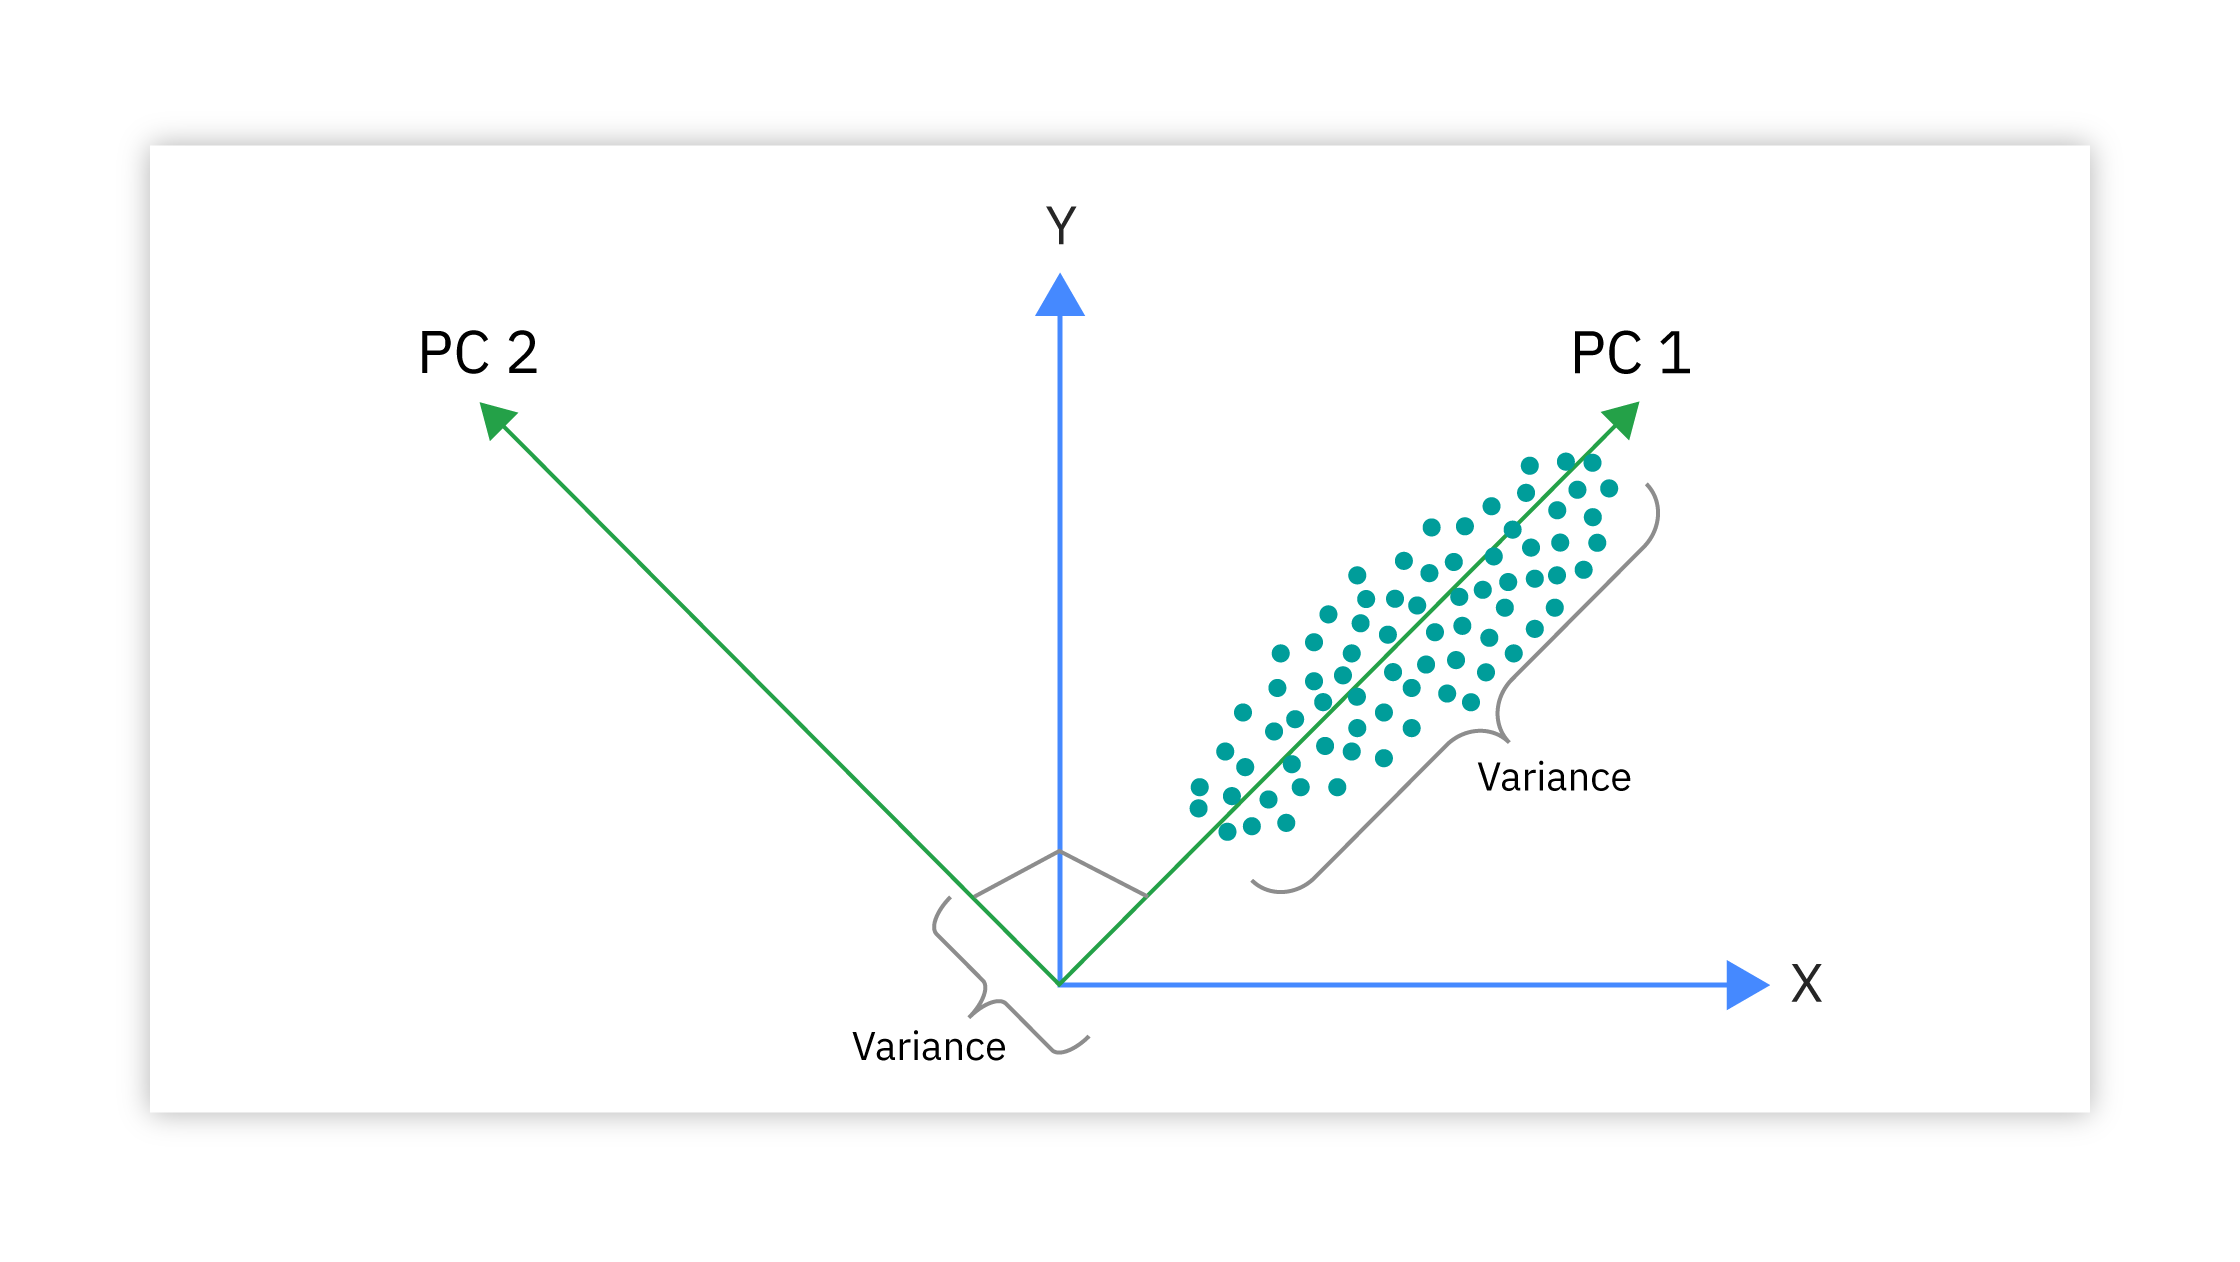

In [7]:
Image(filename= 'pca.png', width = 800, height = 800)

**2. K-Means**
   
KMeans is a centroid-based clustering algorithm that partitions data into 'k' groups by minimizing the variance within each cluster. It iteratively assigns points to the nearest cluster centroid and updates centroids until convergence. KMeans is used strictly for numerical data, which is a dire shortcoming of the method. For categorical data, we use KModes method, which computes mode of the data unlike the centroid in KMeans.

**Advantages:**
- Simple and efficient.
- Works well for spherical clusters.

**Disadvantages:**
- Sensitive to initialization.
- Struggles with non-spherical or uneven cluster sizes.

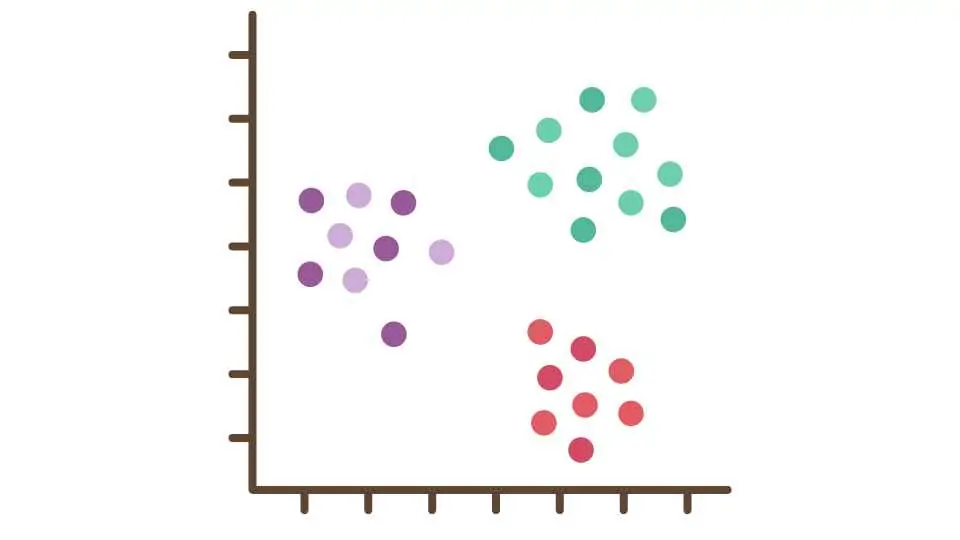

In [9]:
Image(filename='kmeans.png', width = 800, height = 800)

**3. Matrix Completion**
   
Matrix Completion refers to the task of inferring missing entries in a partially observed matrix, under the assumption that the full matrix has an underlying low-rank structure. The intuition is that the observed data lie near a lower-dimensional subspace, and this structure can be exploited to recover unobserved values. So by using the techniques of Singular Vector Decomposition or SVD, we decompose and reconstruct the matrix. The reconstruction error typically measured using root mean squared error (RMSE) or mean absolute error (MAE) it serves as a metric for evaluating the quality of the completion.

**Advantages:**
- Recovers missing data effectively.

**Disadvantages:**
- Assumes low-rank structure.
- Performance drops with high missingness.
- Computational cost increases with size and rank.

**4. HClustering**
   
Hierarchical clustering builds a tree of nested clusters called dendrogram without pre-specifying the number of clusters. It can be agglomerative (bottom-up) or divisive (top-down), and uses linkage methods (single, complete, average, centroid) to compute cluster distances.

1. Single Linkage: Distance between the closest pair of points in two clusters (minimum distance).

2. Complete Linkage: Distance between the farthest pair of points in two clusters (maximum distance).

3. Average Linkage: Average distance between all pairs of points across two clusters.

4. Centroid Linkage: Distance between the centroids (mean vectors) of two clusters.

**Advantages:**
- No need to define k.
- Visual cluster structure.
- Flexible linkage options.

**Disadvantages:**
- Computationally expensive.
- Sensitive to noise and linkage choice.
- Lesser interpretability with large datasets.

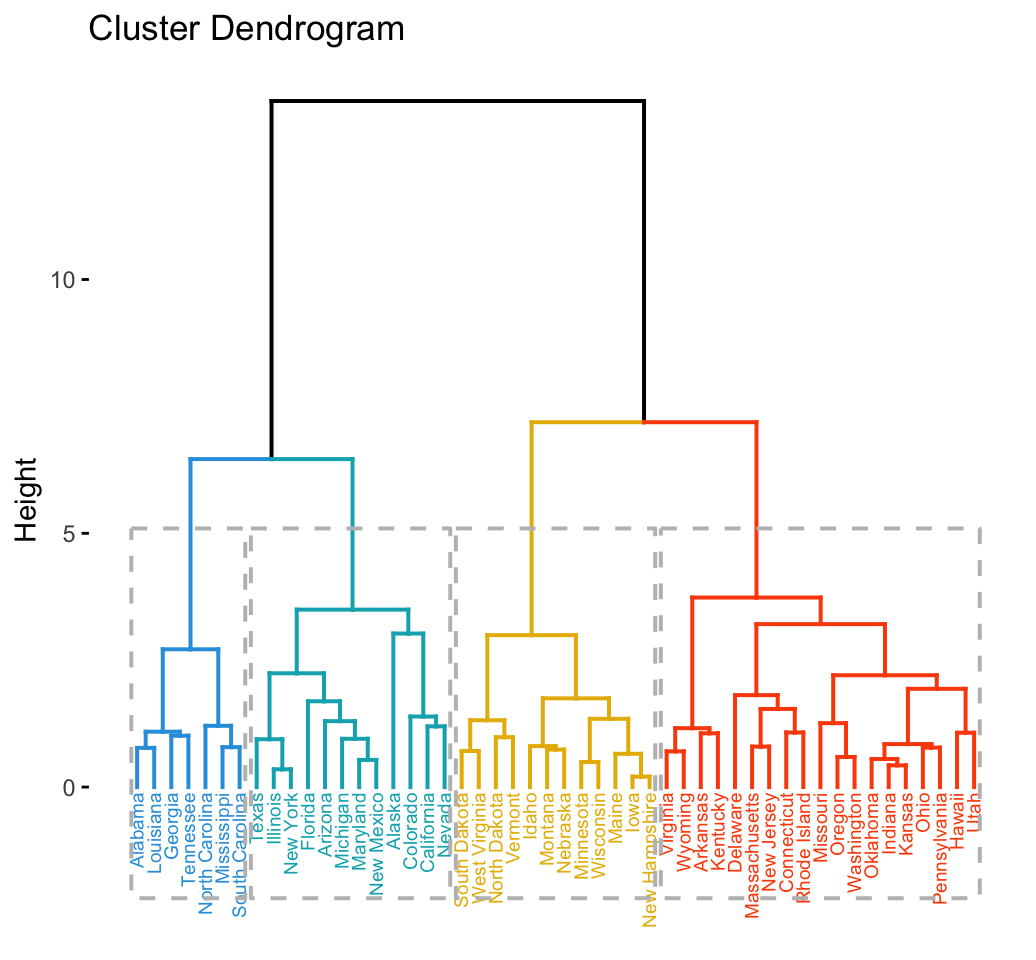

In [12]:
Image(filename='hclustering.png', width=800, height=800)

Now let us go through some metrics that will help us understand how our models perform!

**1. Scree Plot**

A Scree Plot is a tool that we use here in our blog to display the proportion of total variance explained by each principal component. It plots the eigenvalues (variance) in descending order.

*Usage:*

Helps identify the "elbow point," where adding more components yields a decrease in the explained variance. The elbow point method assists in selecting the optimal number of components for dimensionality reduction.

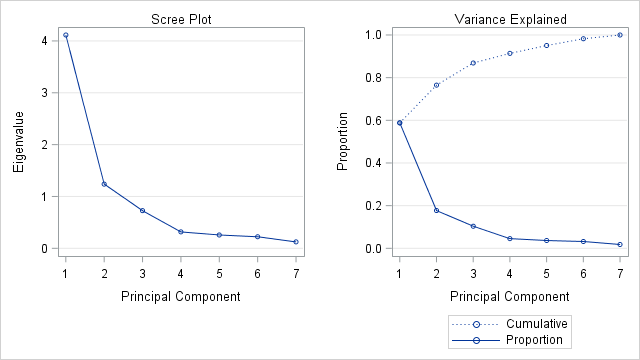

In [14]:
Image(filename= 'sp.png', width=800, height=800)

**2. Silhoutte Score**


The Silhouette Score is a metric used to evaluate the quality of clustering by measuring how similar a data point is to its own cluster compared to other clusters.

For each sample \( i \), the silhouette score \( s(i) \) is defined as:

\[
s(i) = (b(i) - a(i)) / max(a(i), b(i))
\]

**Where:**

- \( a(i) \): Average distance to all other points in the same cluster.
- \( b(i) \): Lowest average distance to points in any other cluster.

**Interpretation:**

- **\( s(i) \) close to 1**: The sample is well matched to its own cluster and poorly matched to neighboring clusters.
- **\( s(i) \) close to 0**: The sample lies on the boundary between clusters.
- **\( s(i) \) close to -1**: The sample may be misclassified and assigned to the wrong cluster.

The overall silhouette score is the average of \( s(i) \) over all data points. It is often used to assess the number of clusters typically in KMeans.

## 🔧 Methodology

Time to see the recipe for our detailed analysis of the Spotify dataset:

**1. Data Cleaning**

The Spotify dataset was cleaned by dropping missing values. Irrelevant or textual columns such as track name, artist name, and IDs were removed to retain only useful numerical features. Because the unsupervised learning techniques we aim to use need the data to be strictly numerical. We found that the data had some tracks duplicated. These duplicates show up under different genres — R&B, Alternative, Children’s Music, Indie, Pop. But all have identical acoustic features. These songs are not truly different in terms of their acoustic features just genre labeling is different. Since our analysis focuses on audio features rather than genre, we will remmove these duplicate values.

**2. Feature Transformation**

In this step, we applied log transformation to features like duration_ms, instrumentalness, and speechiness which were originally skewed and doing this will make distributions more symmetric. And after that, we standardized numerical features and made sure to **mean-center and scale the data**. Mean-centering involves adjusting each feature so that its average value is 0, while scaling will help to have each feature in similar range (typically a standard deviation of 1). It is important as without it, features with large values will dominate analysis and feature comparison would not be fair.

**3. PCA**

PCA was applied to the standardized data to reduce the number of features while retaining most of the variance. The explained variance ratio was plotted (scree plot) to visualize how much information is captured by each principal component. The first two components (PC1 and PC2) were selected for 2D visualization and downstream clustering.
The resulting PCA projection enabled visualization of the high-dimensional structure and hinted at natural groupings, some of which aligned with known genres.

**4. Clustering**

- KMeans Clustering was performed with different values of k (2 to 7), and evaluated using silhouette scores and inertia to find optimal groupings.
- Hierarchical Clustering was done using multiple linkage methods (single, complete, average, centroid), and dendrograms were plotted to visualize cluster structure.

**5. Matrix Completion**

Since our Spotify dataset didn’t naturally have missing values, we simulated **missingness** by randomly removing 5% to 25% of the data. We then filled in these missing values using a low-rank SVD approach. At each step, we performed SVD on the current estimate of the data, breaking it into three parts: U (how songs relate to patterns), S, and V (how features relate to patterns). We reconstructed the matrix using the top M patterns to focus on the main trends and replaced the missing values with these estimates, repeating the process until changes were minimal. After filling in the missing values, we calculated how well the imputed data matched the original by measuring the approximation error. We repeated this process multiple times at different missing levels (5% to 25%) and different ranks (M=1 to 8), averaged the errors, and plotted them to see how well the matrix completion worked.

## 📊 Results

We have a number of plots to go through and look for their intepretation.

### PCA

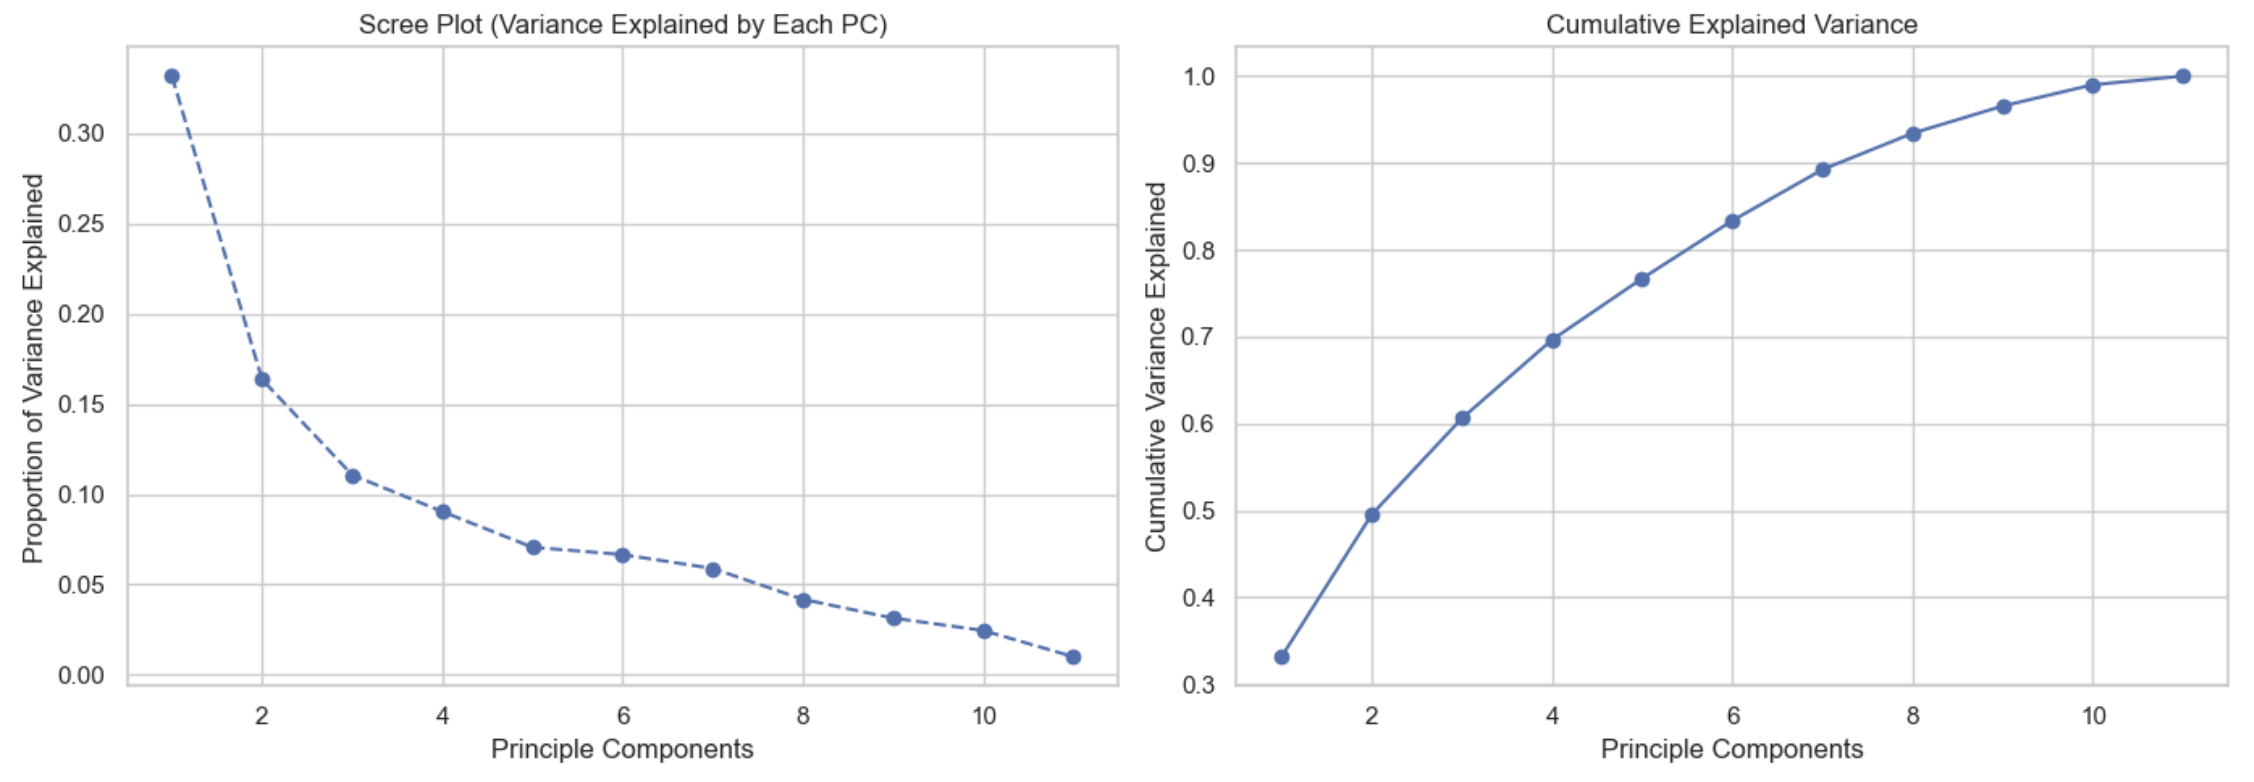

In [20]:
Image(filename='screeplot.png')

The first principal component captures a big chunk of the variance (around 30–35%), but after that, the amount of variance explained by each component drops off quickly. By the time we get to the 3rd or 4th component, the gains from adding more components start to level off.
This tells us that we can capture a lot of the meaningful patterns in the data with just a few components.

**Cumulative Variance Explained**

The curve climbs steadily and shows that the first 6 to 7 components together account for about 80–90% of the total variance in the data. After that, the curve flattens out, meaning adding more components won’t give us much new information. This makes it clear that we don’t need to use all components—just the first few are enough to capture most of the important patterns.

**How Many Components to Consider?**
Based on the scree plot and cumulative variance, we should keep about 6 components. This number captures most of the structure in the data while keeping things simple and interpretable.

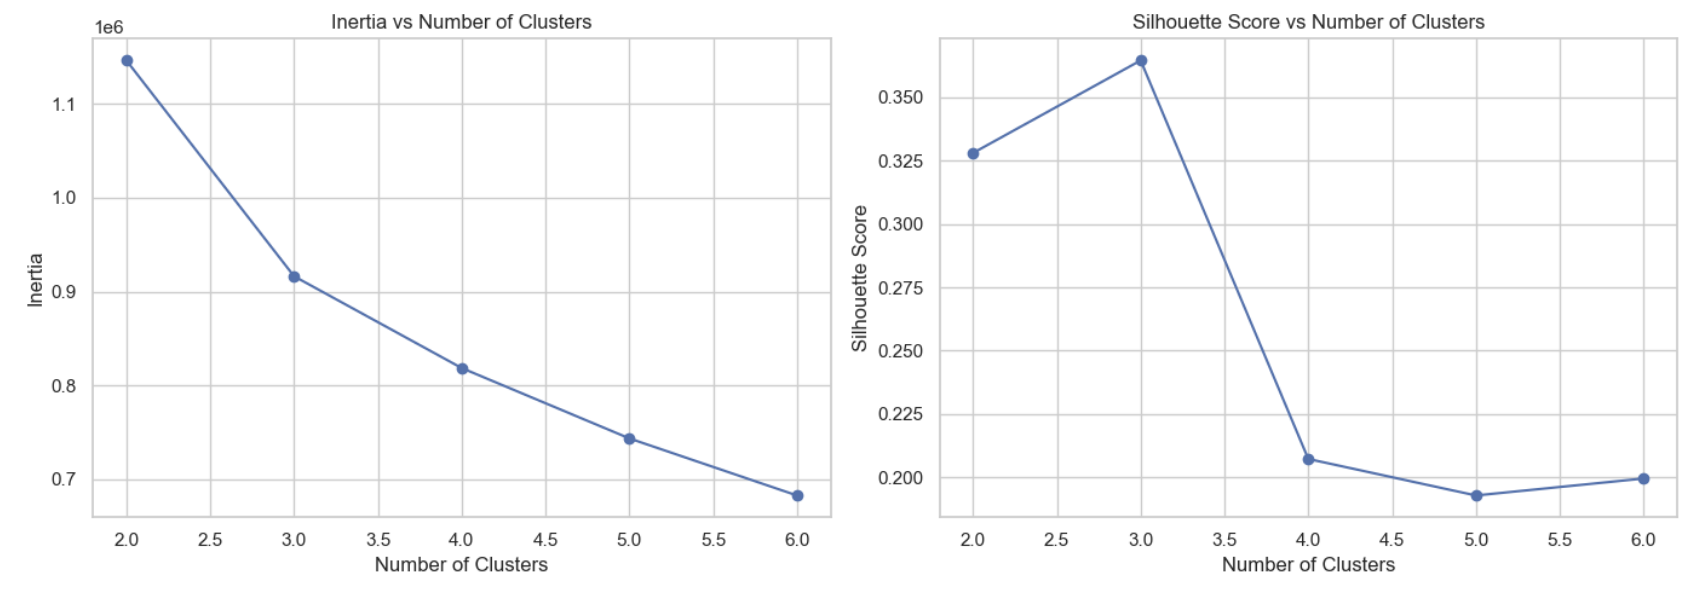

In [22]:
Image(filename='inertia.png')

To figure out how many clusters make the most sense for our Spotify data, we used two tools: the Elbow Method and Silhouette Score. The Elbow Method showed a sharp drop in inertia (which means tighter clusters) up until k=3, after which the improvement slowed down and forming a visible elbow in the plot. This tells us that using more than 3 clusters doesn’t give us much extra value.

Then, the Silhouette Score, which checks how well each song fits in its cluster, confirmed this finding. The score peaked at k=3, meaning the clusters were the most compact and distinct at that point. After that, the score dropped, meaning extra clusters just added confusion.

Both methods agree, 3 clusters give us a clear and meaningful way to group songs.

### K-Means Clustering

Using PCA and Clustering let us map 30 random songs and interpret it.

Image('songs_dataset_cluster.png') 


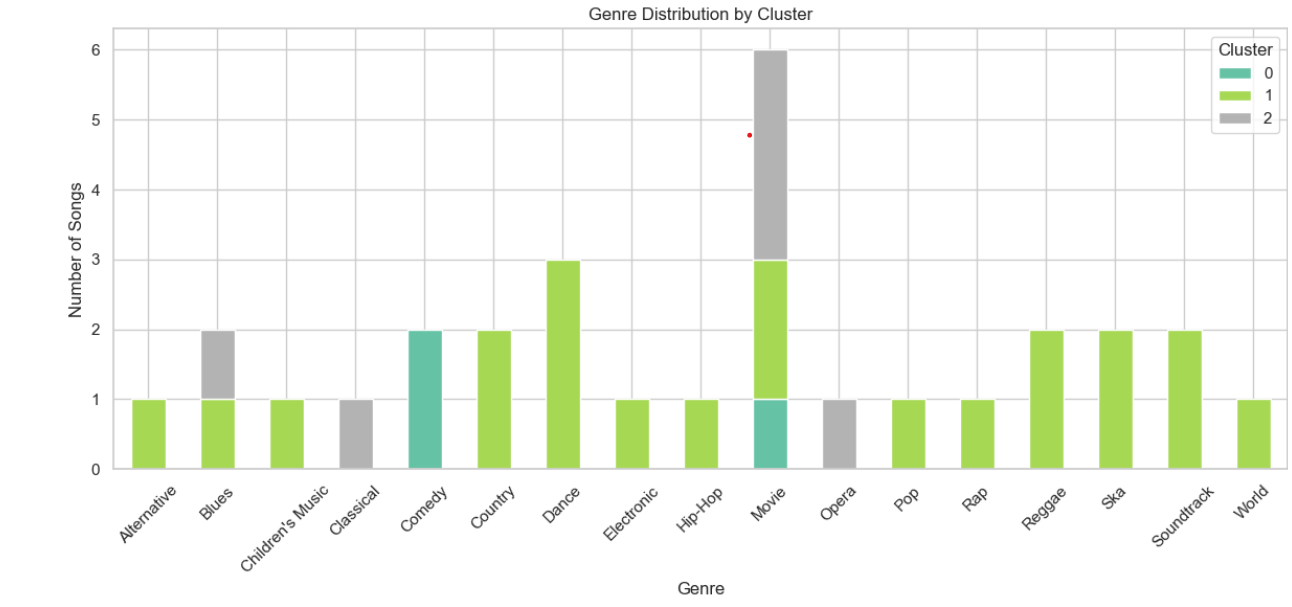

In [24]:
Image('genre_distribution.png')

**What the PCA space signifies?**
Randomly 30 songs were selected from the dataset and projected into PCA space. PC1 is the major component which explains most variance presence in the dataset so according to our spotify song dataset it might be capturing overall energy and rythm of music. For example, songs with high PC1 scores likely have high energy , high beats, and danceable rhythms, while low PC1 might represent softer or more acoustic tracks.
PC2 is second most important component and orthogonal to PC1 might captures variance explained by other features like valence or dancibility. Such as higher PC2 might point to more uplifting tunes, while lower PC2 might suggest moody or classical music.


**What does each cluster represent?**

When we projected 30 songs from our dataset into PCA space as shown in above picture, it got assigned to a particular cluster. Now let's see what this cluster holds.

* **Cluster 0 - Blue:** 3 out of 30 songs which belongs to Genre Comedy and Movies and the cluster is sparsed which likely represents humorous tracks with unique audio profiles that stand apart from the mainstream music.

* **Cluster 1 - Orange:** 19 out of 30 songs belongs to this cluster and is quite dense and looking into genre of this songs it mostly belong to Ska, Country, Alternative, Hip-Hop, Electronic, Pop, Reggae, Soundtrack, Dance, Children's Music which represent this cluster represent mix of upbeat, rhythmic, and dance-friendly songs. This large cluster captures the popular mainstream genres with higher energy and rhythm.

* **Cluster 2 - Green:** 6 out of 30 belongs to this cluster and if we look at it it is sparse at the end but majorly dense in middle section and songs that fall into this cluster belongs to genre like Blues, Movie, Classical, Opera.  Hence, this cluster seems to have tracks with lower tempos, more acoustic or orchestral instrumentation, or complex arrangements.
  
The PCA scatter plot shows clear separation among the three clusters, with Cluster 1 (orange) being the most compact and energetic, while Cluster 2 (green) is more diffuse and mellow. The boxplots confirm this: Cluster 1 has the highest energy, danceability, tempo, and loudness. Cluster 2 is the most acoustic and quiet, and Cluster 0 sits somewhere in between.

If we look more deep at **particular songs** to understand more about nature of each cluster as one song from our 30 randomly selected song is **“My Goal” by Tom Segura (Comedy** and this song fits Cluster 0’s theme of comedic or narrative content, likely featuring spoken word or humorous lyrics, aligning with the cluster’s low representation and specialized content. Song like **“Friends (with BloodPop) by Justin Biber(Dance)** reflects Cluster 1’s focus on upbeat, high-energy songs, with strong rhythms and mainsstream. While **“Diabelli Variations” by Ludwig van Beethoven (Classical)** represent classical piece aligns perfectly with Cluster 2’s representation of slower, nuanced, and often instrumental songs, highlighting its lower energy and higher acoustic features.

**Now let's see how this clusters share similarity and disimilarity with each other**

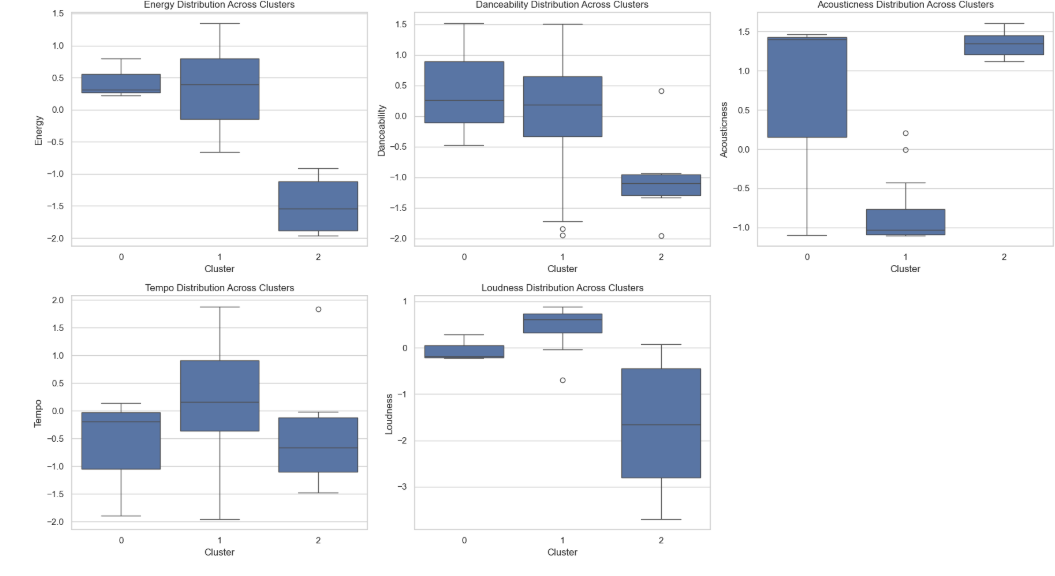

In [47]:
Image('data_interpretation.png')

If we talked about features in general that were compressed and projected into PCA space we would get more interpreability in terms of understanding nature of each cluster.

Clusters 0 and 1 are similar because they both have songs with higher energy levels, meaning they both are lively and upbeat. They also share similar danceability, so both clusters have songs that are good for dancing. On top of that, both clusters include louder songs, which more mainstream.

Clusters 1 and 2 are alike in some ways too. Both clusters include songs with a range of tempos, meaning you can find both faster and slower songs in these groups, though Cluster 1 has a wider range. Even though Cluster 2’s songs are generally less danceable, there is a small overlap with the less danceable songs in Cluster 1. Lastly, while Cluster 2 has higher acousticness overall (more natural or acoustic sounds), Cluster 1 still has a few songs with similar acoustic qualities.

Clusters 0 and 2 share a few things as well. They both include some quieter songs compared to Cluster 1, so they might sound softer or more mellow. Even though Cluster 2 leans more towards acoustic songs, Cluster 0 also has a few songs with acoustic qualities, making them similar in that way. Finally, both clusters have songs with more consistent tempos, unlike Cluster 1, which has a wider variety of tempos.

So in conclusion, the closter 0 and 1 are quite similar in terms of numerical features while cluster2 share some commonality with cluster 0 and 1 but most if its features are completely opposite from both clusters.

**Now let's see our music choice signifies what and we fall into which cluster**

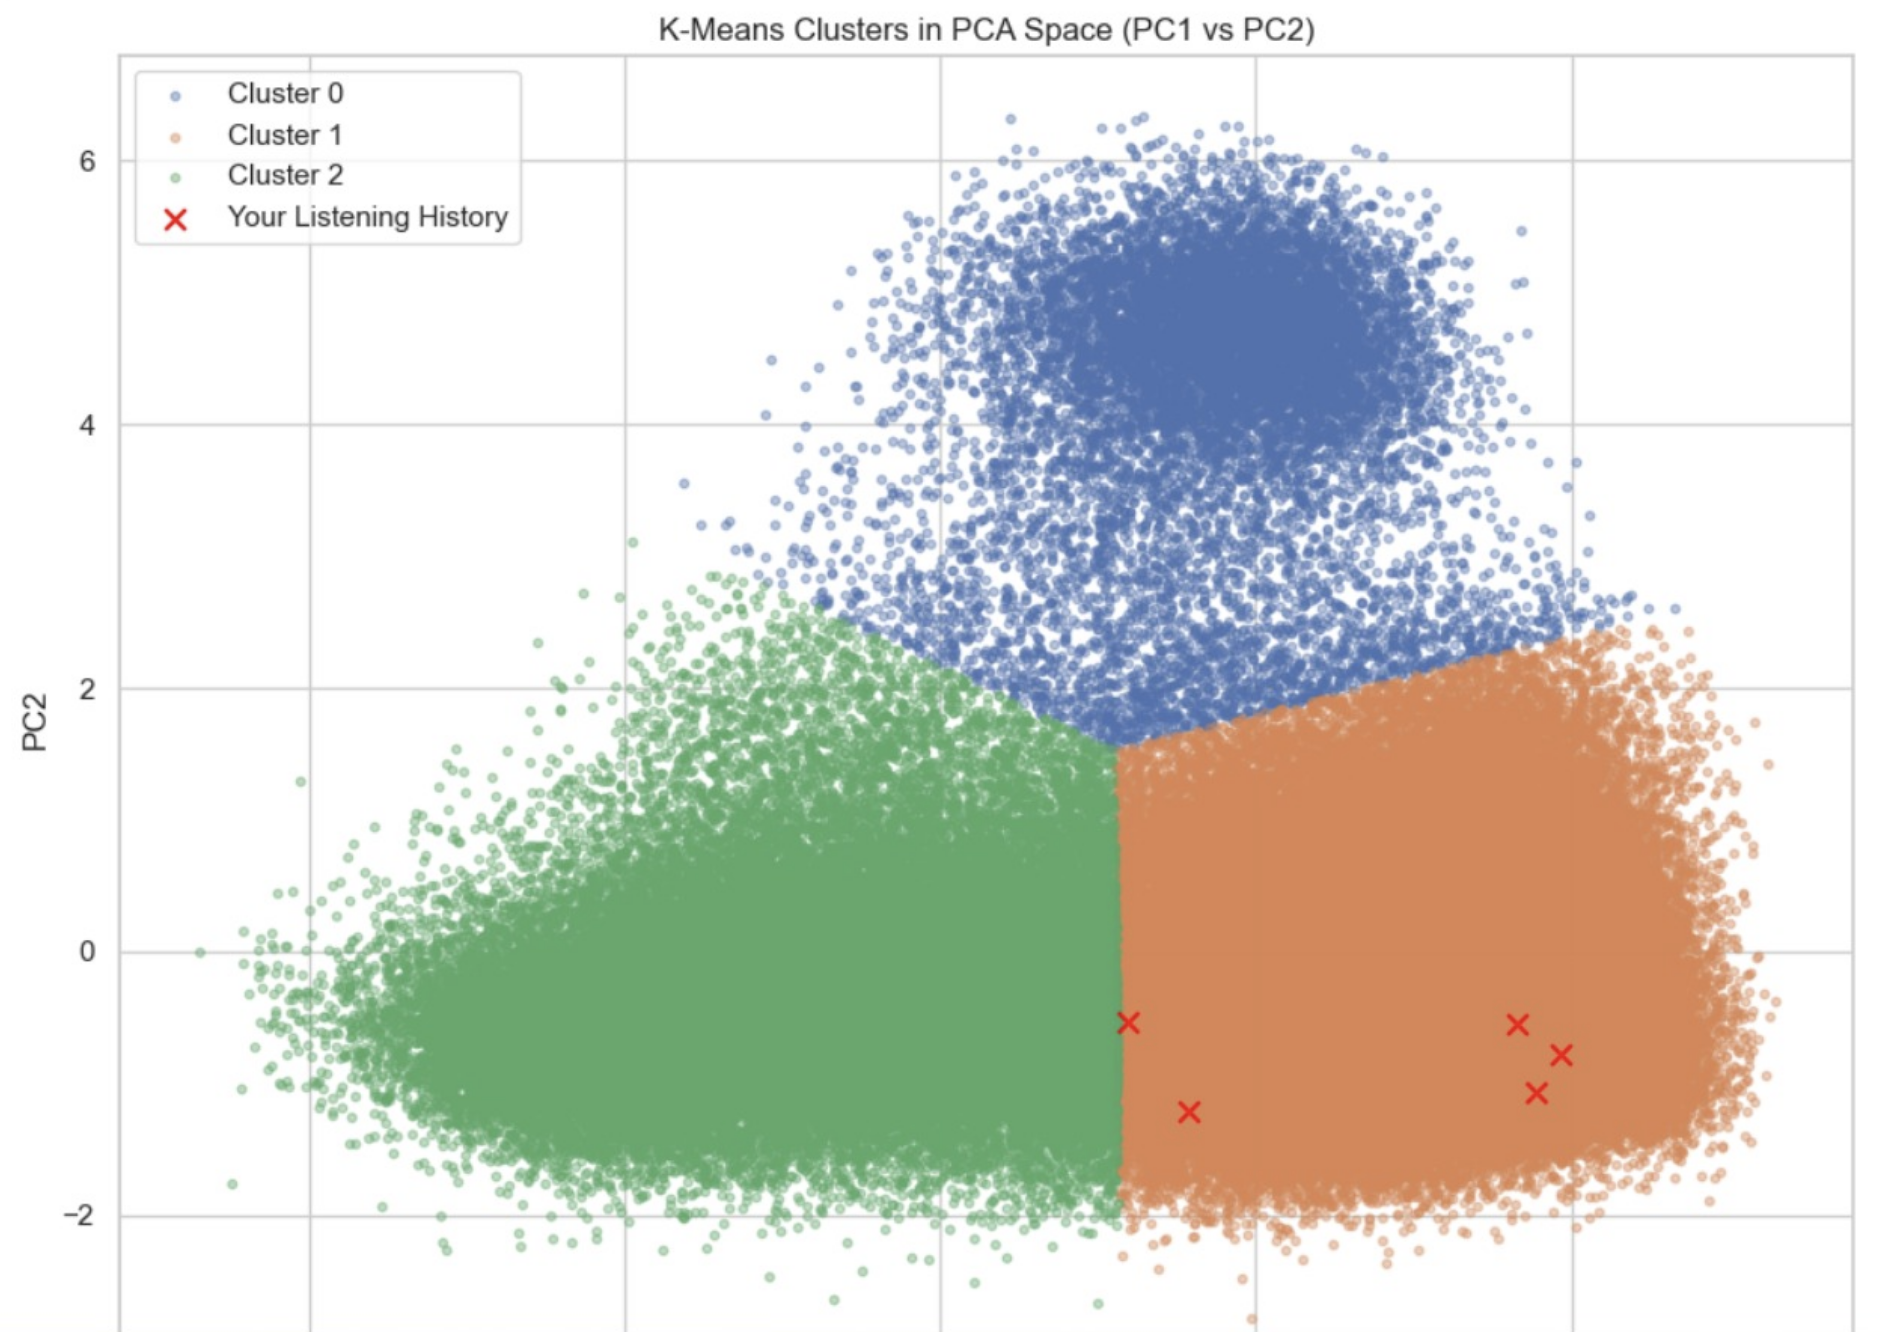

In [26]:
Image(filename='cluster.png')

When we visualized our listening history—featuring tracks like “Shinunoga E-Wa,” “DNA.,” “Heat Waves,” “Older,” “Lovely,” “YOUTH,” “Jesus in LA,” and “Feelings” against the Spotify dataset using principal component analysis (PCA), we uncovered some insightful patterns about our musical preferences.

This scatter plot shows every song as a dot in a two-dimensional PCA space, where complex audio characteristics (like energy, valence, danceability, tempo, and more) are compressed into principal components. These dimensions essentially capture the underlying structure of Spotify’s sonic universe.

Our listening history appears as bold red X’s lies on the clusters formed by all other songs. While not all tracks from our list were present in the dataset, the ones that were tend to fall within specific clusters suggesting shared audio traits. For example, these songs may repreent a cluster of high energy, high loudness and lower aucosticness that places them within a distinct musical neighborhood.

From the plot, we notice our points concentrate in just one the K-Means-defined clusters. This suggests that, despite believing our tastes are broad, the music we gravitate toward may share less obvious similarities possibly in style such as pop, or tempo.

By looking at this visualization, we’re not just seeing songs we’re seeing how we fit into Spotify’s greater musical landscape. And what emerges is a clear signal: our favorite tracks are more aligned than we might have guessed.

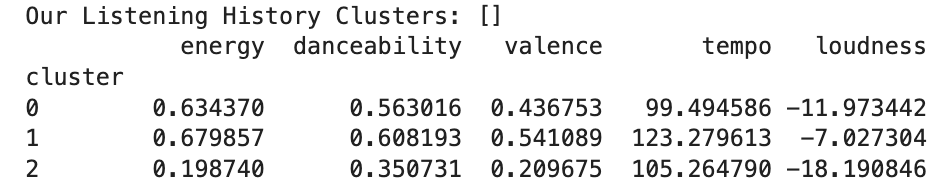

In [28]:
Image(filename='habits.png')

When we applied K-Means clustering to Spotify’s song catalog using PCA-transformed audio features, the songs naturally grouped into three distinct clusters. These clusters represent hidden musical “neighborhoods,” showing how different styles and moods are distributed across Spotify’s vast library based on audio characteristics rather than genre labels.

Cluster 0 (Blue) is made up of songs with moderately high energy (0.63) and slightly above-average danceability (0.56). The valence score (0.44) suggests a more introspective or melancholic tone, and with a tempo around 99 BPM and relatively low loudness (-11.97 dB), these tracks likely fall into the mellow or chill category—think ambient, lo-fi, or reflective pop.

Cluster 1 (Orange) stands out as the most energetic group, with the highest energy (0.68) and danceability (0.61) among all three. The valence (0.54) indicates an overall positive or balanced emotional tone. With a tempo around 123 BPM and louder volume at -7 dB, these songs feel vibrant and upbeat. Interestingly, every song in our listening history like Shinunoga E-Wa, DNA., and Heat Waves landed in this cluster. It shows a clear preference for energetic, dynamic tracks with rhythmic drive and emotional lift.

Cluster 2 (Green), on the other hand, is much more subdued. The energy (0.20), danceability (0.35), and valence (0.21) are all the lowest of the three clusters. Tempo sits around 105 BPM, but the loudness is significantly lower at -18 dB, pointing to quieter, more acoustic or minimal arrangements. These are the types of songs that might lean into introspection or emotional depth possibly indie, acoustic ballads, or stripped-down singer-songwriter pieces.

What’s most surprising is that despite thinking our music taste is fairly diverse, every track we looked at landed in Cluster 1. K-Means clustering revealed a hidden consistency in our listening habits: we’re drawn to high-energy, feel-good tracks with a rhythmic edge. It’s fascinating to see how unsupervised learning can surface patterns we don’t even realize about our preferences and how they align with broader musical trends on Spotify.

### Matrix Completion

We simulated data missingness from 5% to 25% and tried to create original dataset using low rank approcimation SVD. Now, we will understand the result in below section.

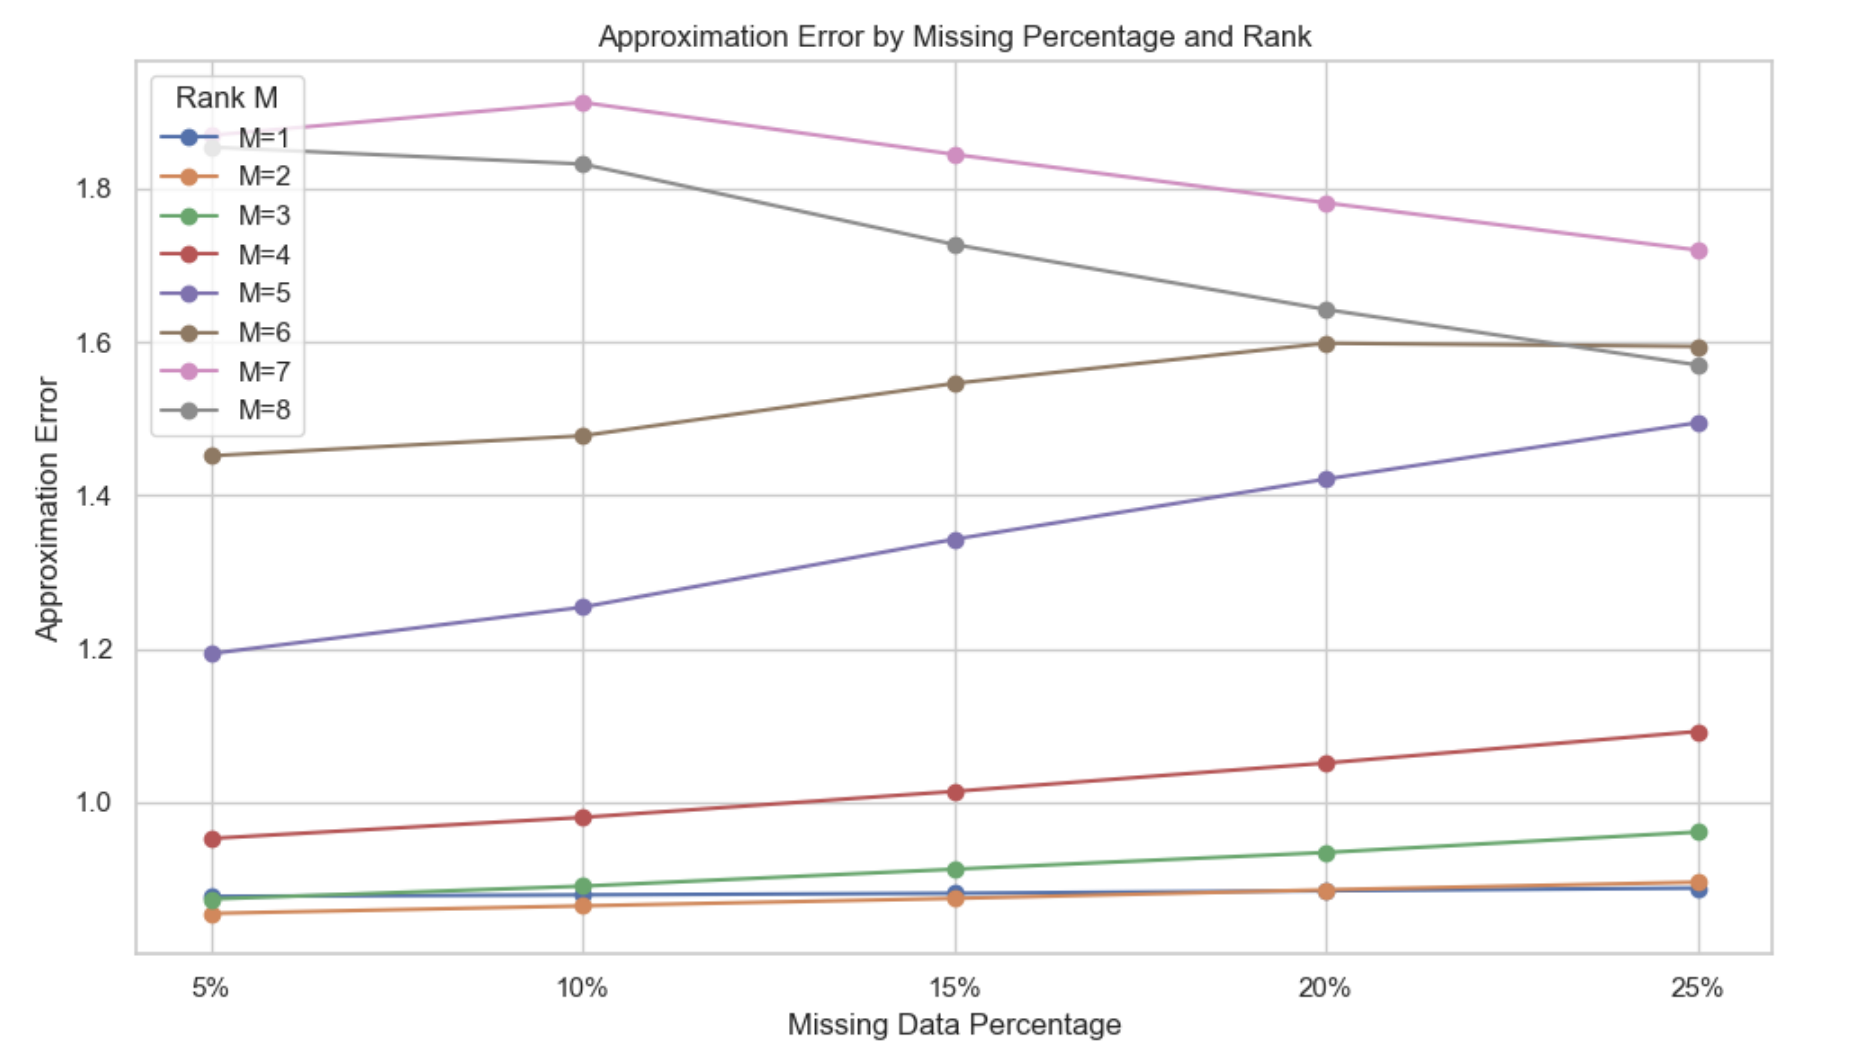

In [30]:
Image(filename='mc.png')

The general observation is as the missing data increases the eroor tends to increase which is obvious dur to information loss. **M=2** achieves lowest error acroos all missing data proportion.
Higher ranks like M=7 and M=8 show much higher errors at low missing levels which suggest overfitting the data.
So, for this dataset low rank **M=2 or M=3** represents balance between accuracy and will not overfit or underfit the data.

* To further validate the interpretation and finding best rank the original dataset with 10% missing values were created using different ranks and below is the result.

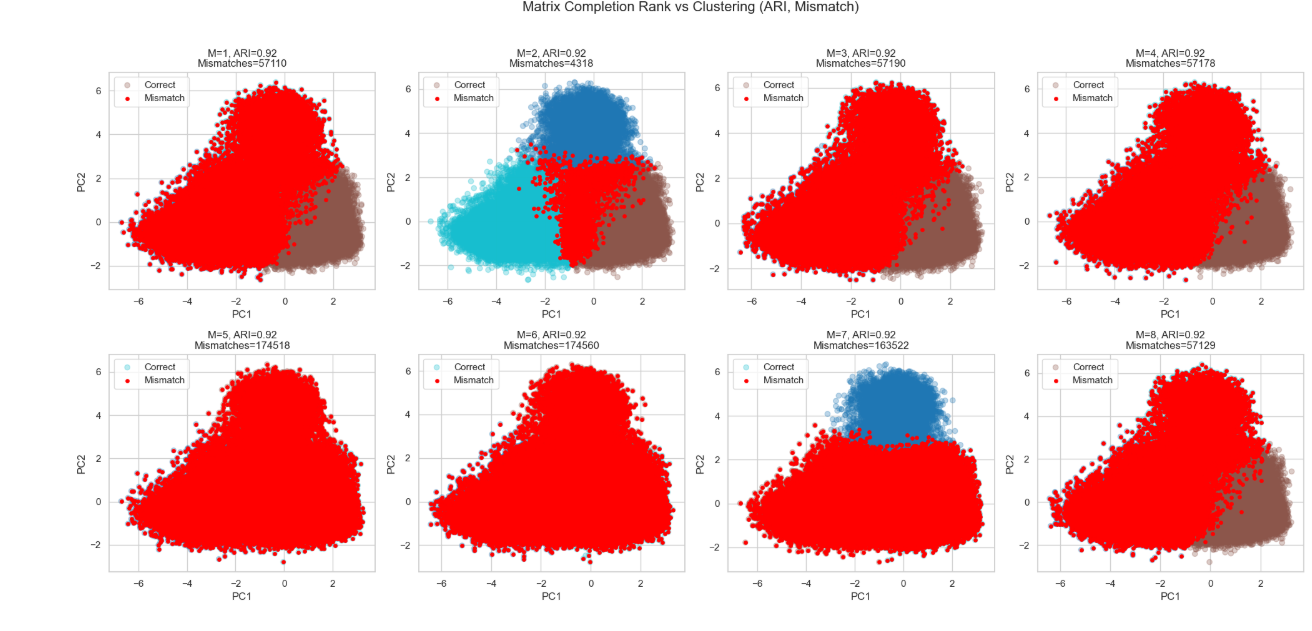

In [56]:
Image('matrix_completion.png')

* M=2 has the fewest mismatches (4318), suggesting it is quite similar and aligned with original clusters. while, M=5–6 have massive mismatch counts of ariund 160k-170k, suggesting poor alignment with original clusters even though having similar ARI. It is obvious that low rank approximation **M=2** is suffficient to impute missing value and perfectly alignd with original cluster giving lowest approximation error.
* When we perform Singular Value Decomposition (SVD) or related matrix factorization techniques data matrix X can be decomposed as X~ USV where U represents the left singular vectors, capturing relationships between rows (i.e., different songs), V represents the right singular vectors, capturing relationships between columns (i.e., audio features) and S contains the singular values, indicating the importance of each component.
* At M=2, we found that it reconstructs the dataset with lower approximation error than higher ranks for 10% missingness.This means that two dominant patterns (captured by two singular values and corresponding U and V vectors) are enough to capture most of the structure in the dataset.

### Hierarchical Clustering

we will explore the structure of Spotify music data to identify whether genre-based groupings happens by performing hierarchical clustering on a scaled sample of audio features. 
Then we will compare clustering behavior across different linkage methods—single, complete, average, and centroid using ecludiean distance and how it seprates clusters.
The dendrograms are labeled with genre and song name, which is easy for idntifying grouping patterns of different genre based on feature similarity and dissimilarity.
For better interability we used only 40  subsamples from original dataset.

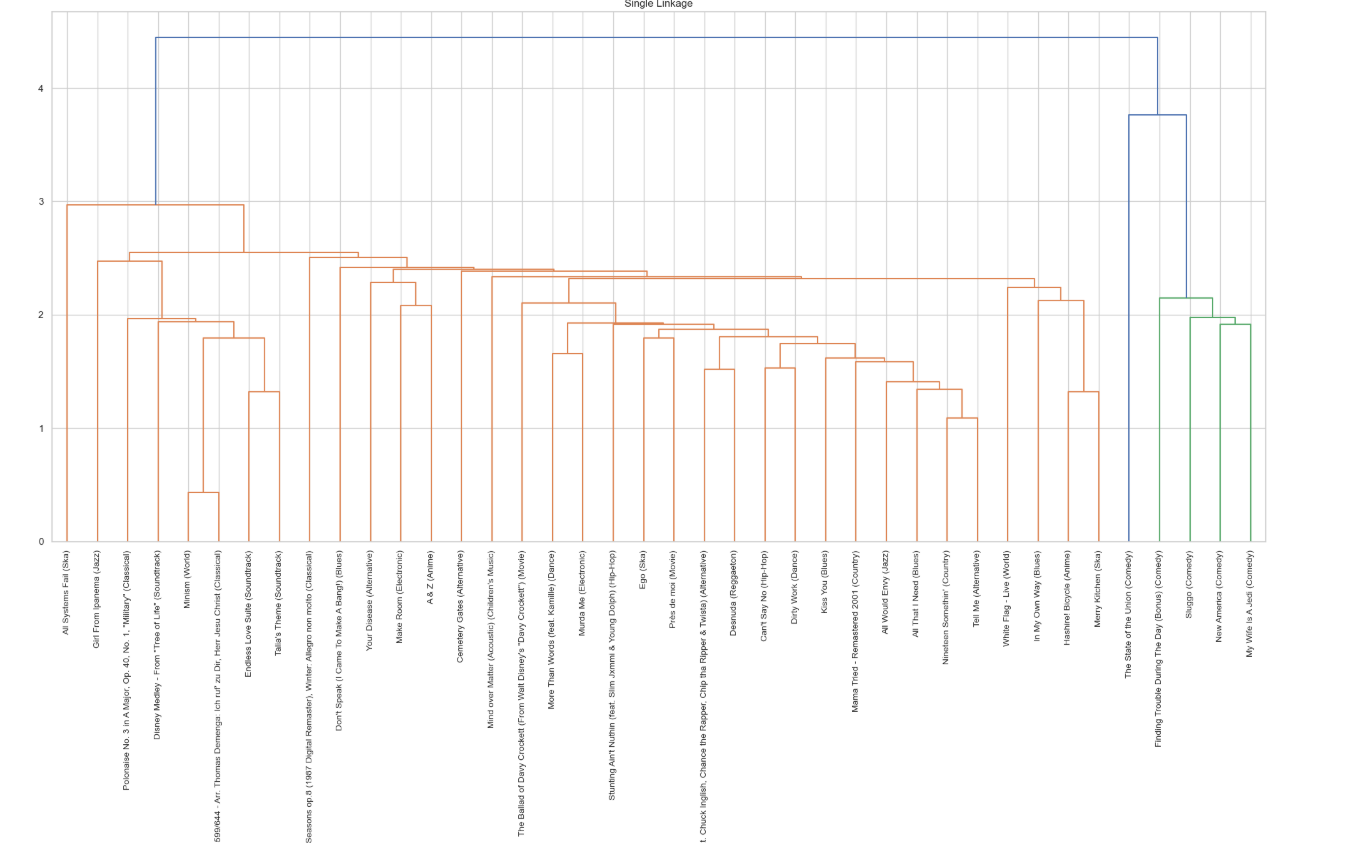

In [88]:
Image(filename='single_linkage.png')

- Single linkage creates long, chain-like clusters rather than compact groups.In the lower levels, many small merges happens at the right (green and orange), where songs with similar features (maybe same genre or tempo) are linked. As moving at higher levels, those small clusters gradually merge into larger ones.Some songs remain isolated until the final steps (like the blue branch at the far right), reflecting unique musical features.

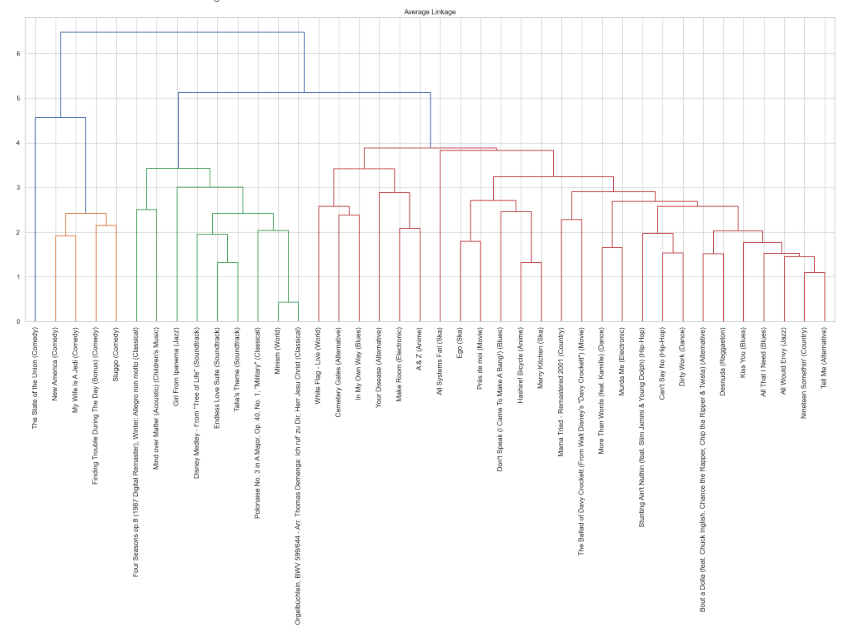

In [90]:
Image(filename='average_linkage.png')

- In average linkage, as we move at upper levels the clusters gradually merge based on their overall similarities (like similar tempo, energy, etc.), forming clear groups. For example, clusters of similar genres (like comedy,pop or dance)have formed a tight group, then merge at higher levels with other clusters that share overlapping audio features.

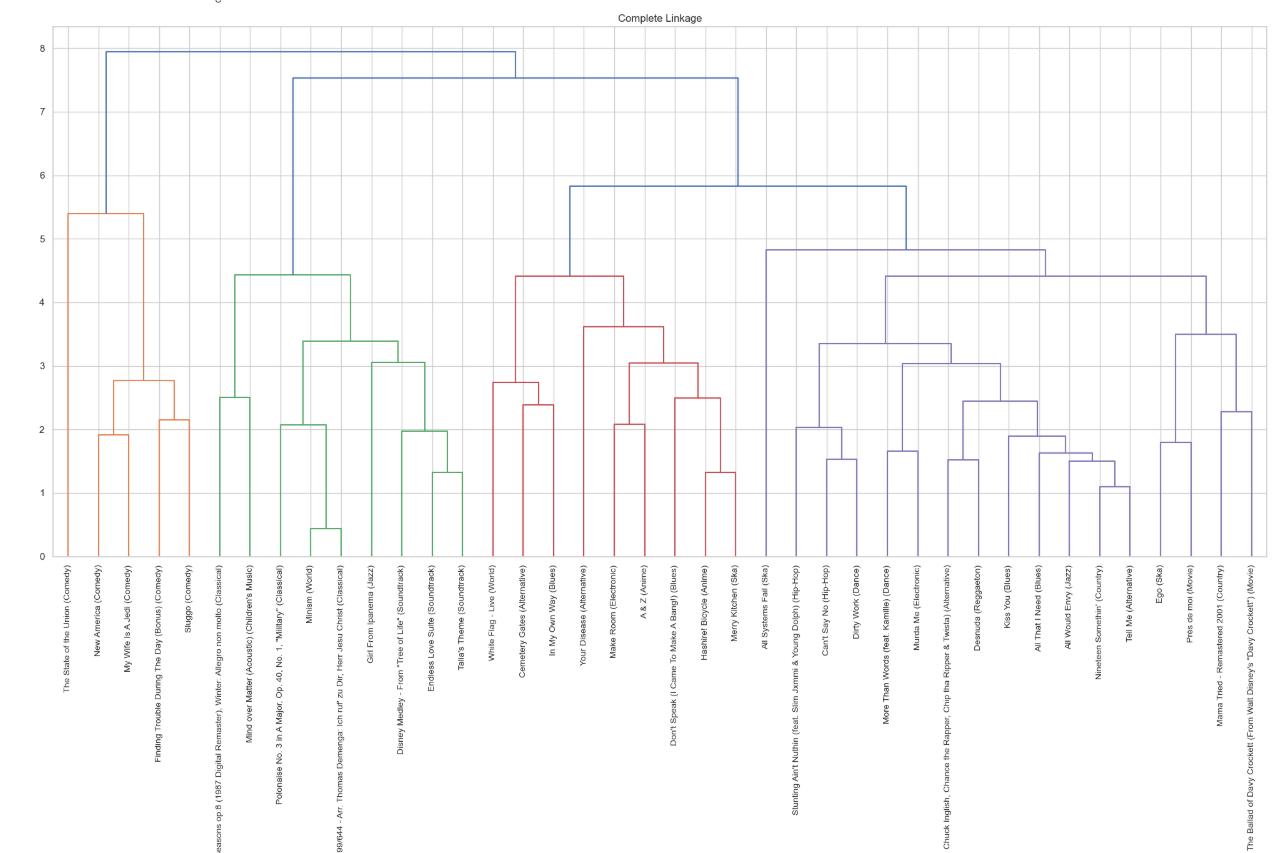

In [92]:
Image(filename='complete_linkage.png')

- In complete linkage,chaining is avoided, so the clusters tend to be balanced compared to single linkage.Songs in the same genre or with similar rhythm or acousticness tend to merge at lower heights. Diifferent clusters (e.g. Pop merging with Classical) only merge at the top levels because they have higher dissimilarities.

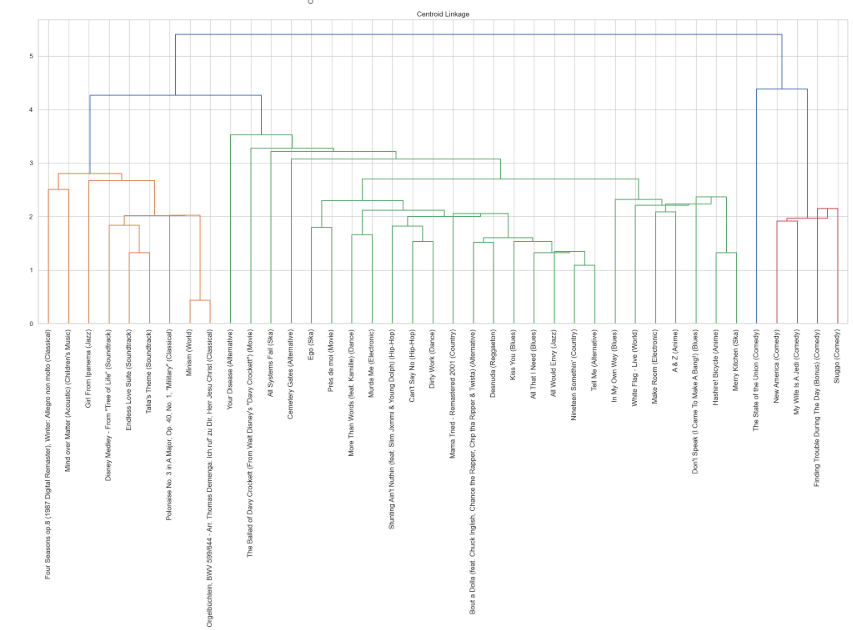

In [96]:
Image(filename='centroid_linkage.png')

- In centroid linkage, songs that share similar overall feature averages (like average energy or tempo) group together early. say for example,Some genre-specific songs or those with similar average loudness or rhythm may merge even if some individual tracks are quite different.Because of the centroid approach, this method can be sensitive to outliers and a single song with different characteristics can shift the centroid and influence the clustering.

### PCA based Hierarchical Clustering

**Since the dataset has many numerical features, we will now try to reduce dimensionality and hence it will reduce feature set components and not consider non correlated features.**
We will perform Hclustering based on euclidean distance based on average linkage as it is the best as compared to other methods proven from avove graphs and cmap. Using euclidean distance and  PCA transforms the data to its most informative structure, making clustering more meaningful. As we seen in kmeans PCA components elbow graph 5-6 components are sufficient to represent above 80% of variance. Similarly we are using only 6 PCA components which will lowers the computational burden of computing pairwise distances in linkage.

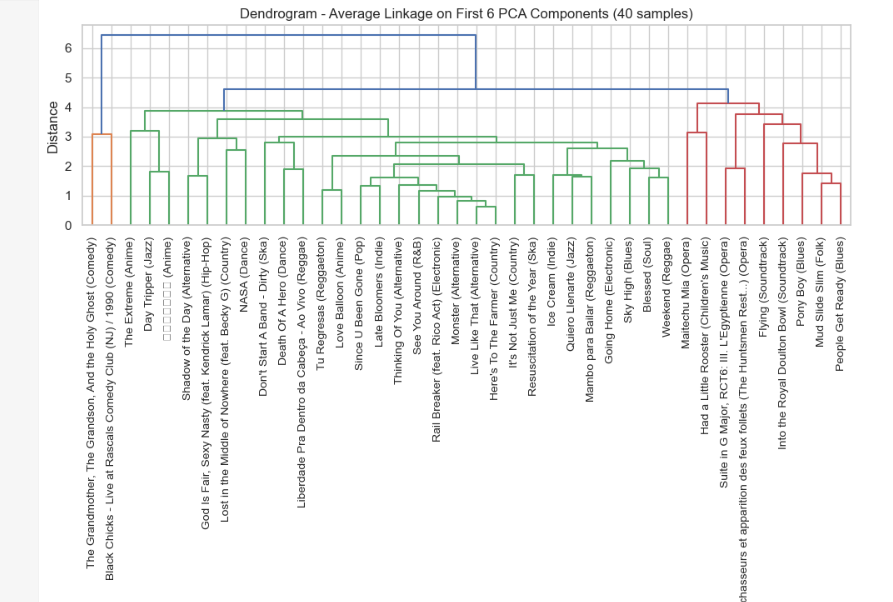

In [108]:
Image(filename='PCA_based_HClustering.png')

This dendrogram uses average linkage to group 40 songs based on their first six principal components (which capture the most important variance in the dataset). In the dendrogram, songs from similar genres tend to cluster together first because they share similar musical features. For example, Comedy songs are clustered together quickly, showing they sound similar. Hip-Hop songs join a bit later, meaning they are different but still have something in common with Comedy or other popular styles. Dance and Reggae songs also cluster in the middle, since both have rhythmic beats but still stand apart from slower genres like Opera and Classical. Opera and Classical songs merge at higher distances, meaning they’re quite different from other genres. Folk and Blues songs are also grouped together. This shows how the clustering helps us see which genres are similar and which are unique


## 🗣️ Discussion

Now that we have covered most part of our ananlysis, let us try to answer some very fundamental questions related to our project.

**1. What does the U and V matrix signify with respect to our dataset?**

In the Spotify dataset, the PCA decomposition produces two important matrices:

* **U matrix (or `x` in PCA)**: Contains the coordinates of each track in the principal component space. Each row represents a song’s position along PC1, PC2, etc., capturing how it scores on the new axes. This is what’s visualized in the PCA scatter plot.

* **V matrix (or `rotation`)**: Contains the loadings — the contribution of each original feature (e.g., energy, loudness, danceability) to each principal component. It tells us what each principal axis represents in terms of original audio features.

Together, these matrices describe how tracks are positioned in a reduced-dimensional space and how the new axes relate to the original musical attributes.

Now let us compare our data on two original features versus the first two principle components:

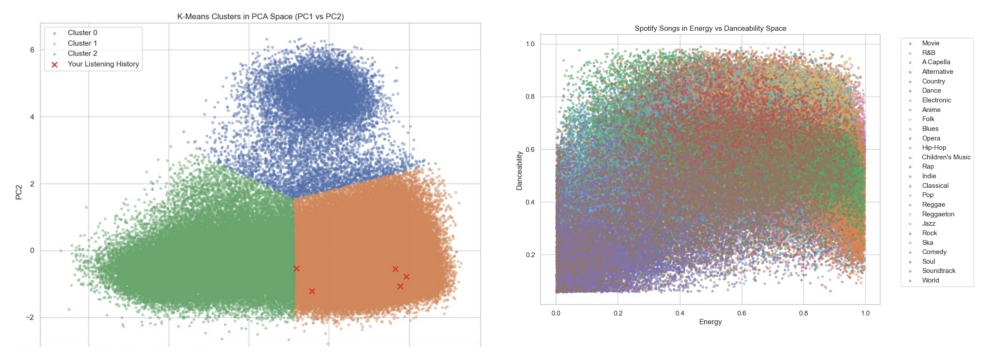

In [37]:
img1 = mpimg.imread('cluster.png') 
img2 = mpimg.imread('original.jpeg')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img1)
axs[0].axis('off')

axs[1].imshow(img2)
axs[1].axis('off')

plt.tight_layout()
plt.show()

The **first plot** shows K-Means clustering results in PCA-reduced space, where three distinct user groups are visible, and your group’s listening habits (red dots) fall in the high-energy, danceable cluster (orange).
The **second plot** is a scatter plot of the original data (Danceability vs. Energy), revealing a dense spread of user behavior skewed toward high danceability and varying energy.
While the PCA plot highlights cluster structure and separation, the raw feature plot shows the true distribution of user preferences.
Our group aligns with the **upper-right region** in the second plot (high energy + moderate-to-high danceability), consistent with its position in the orange PCA cluster.
Overall, PCA simplifies and reveals structure, while the scatter plot reflects the granular reality of the underlying data but is too chaotic to make sense of.

**2.  How do different linkages compare?**

Each linkage method merges song groups or genres differently: single linkage tends to chain songs or genres together based on the closest pair of tracks, which can result in uneven clusters where very different genres might merge too soon. Complete linkage gives priority to the larger distances, which performs group merging only if all genres are similar, producing dense, more compact genre clusters. Average linkage takes the average distance between all songs in two groups often merging genres that share some similarities without forcing overly strict or loose groupings. Centroid linkage merges clusters based on their center points, which is not truly feasible for our datset as outliers might shift the clusters and affect result. So complete and average linkage seems to be more appropriate and allows similar genres to cluster while keeping distinct genres separated, leading to a more meaningful analysis of different style in music.

**3. K-Means Clustering vs Hierarchical Clustering**

when compared both clustering technique against 100 random samples from dataset , HClust (0.2590) has a much higher silhouette score than KMeans (0.2091), meaning the clusters from HClust are more compact and better separated from each other in the feature space.HClust creates more tightly grouped and distinct clusters (better silhouette), but these don't match real genres well. While, KMeans does a bit better in matching actual genres (higher ARI), but its clusters are less cleanly separated which shows clear trade-off as HClust gives cleaner groups, while KMeans captures genre trends slightly better.

**4. Hirearchical Clustering VS. PCA based Hierarchical Clustering**
Average linkage uses all raw features in our case audio features and might be influenced by noise and outliers, while PCA-based average linkage simplifies the data first to highlight the key features, making clustering more stable and easier to interpret.

## 🔍 Conclusion

Through this project, we discovered how unsupervised learning techniques like PCA and clustering can bring insight into musical data. Our PCA analysis revealed that just two components captured around 40% of the dataset's variance, enough to reveal genre-level separability — especially among acoustic, classical, and electronic tracks. The KMeans clustering aligned reasonably well with genre labels, suggesting that genres do carry inherent audio structure. Hierarchical clustering further reinforced these groupings with more flexibility.

Perhaps most interesting was how matrix completion allowed us to reconstruct and still meaningfully cluster data, even with up to 10% missing values a practical boost for real-world noisy datasets.Spotify relies on lots of audio features—like energy, danceability, loudness, tempo, acousticness, and more to understand songs and make recommendations. But sometimes, some songs might be missing certain features because of incomplete data from recording metadata or because they’re newer and haven’t been fully analyzed yet.Imputing missing values means filling in those gaps so that Spotify’s recommendation system can still use all available songs in its calculations. This helps in providing better recommendations, clustering accuracy and fair comparison.

Imputing missing values means filling in those gaps so that Spotify’s recommendation system can still use all available songs in its calculations. 

Whether you're building music recommendation systems or just exploring sonic trends, these tools offer a powerful lens to interpret large audio datasets. This analysis on the Spotify dataset reveals that there isn't just tunes and tempo on the Spotify app, but mathematics too!

## 📚 Bibliography

Hamidani, Z. (2021). Ultimate Spotify Tracks DB [Data set]. Kaggle. https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

Wicklin, R. (2017, August 2). How many principal components should you retain? SAS Blogs. https://blogs.sas.com/content/iml/2017/08/02/retain-principal-components.html

Domino Data Lab. (n.d.). Getting started with K-means clustering in Python. Domino Data Lab. https://domino.ai/blog/getting-started-with-k-means-clustering-in-python

SBME Tutorials. (2019). Week 6: Clustering [Lecture notes]. https://sbme-tutorials.github.io/2019/cv/notes/6_week6.html

Wicklin, R. (2017, August 2). How many principal components should you retain? SAS Blogs. https://blogs.sas.com/content/iml/2017/08/02/retain-principal-components.html